In [2]:
from lectura import ldata
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [3]:
datosapms=ldata('tc01_data/yeast_AP-MS.txt')
datoslit=ldata('tc01_data/yeast_LIT.txt')
datosy2h=ldata('tc01_data/yeast_Y2H.txt')

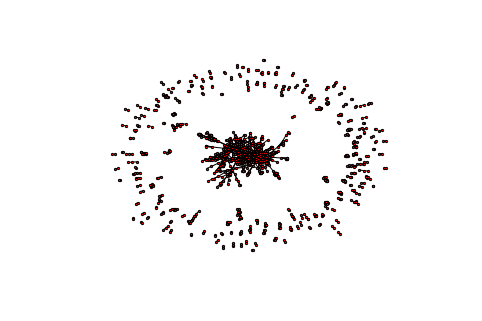

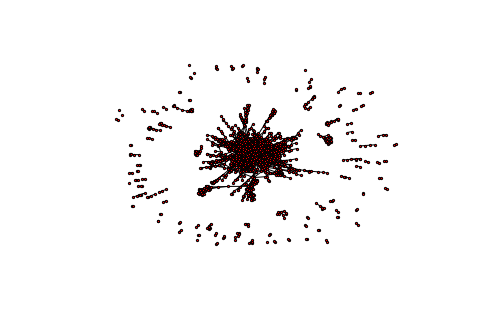

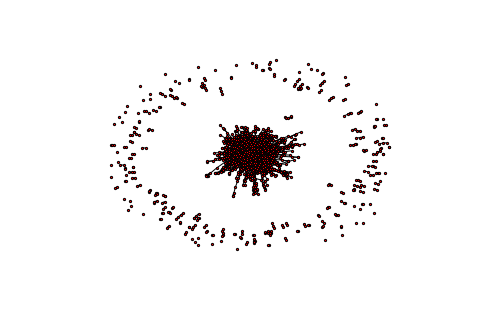

In [4]:
G1 = nx.Graph()#directed
G2=nx.Graph()
G3=nx.Graph()


G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)

nx.draw(G1, with_labels=False, node_size=5)

plt.show()
nx.draw(G2, with_labels=False, node_size=5)

plt.show()
nx.draw(G3, with_labels=False, node_size=5)

plt.show()

In [55]:
nodos=[G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]
enlaces=[G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]
dirigido=["no","no","no"]
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values()))]
kmin = [np.min(list(dict(G1.degree).values())),np.min(list(dict(G2.degree).values())),
         np.min(list(dict(G3.degree).values()))]
kmax = [np.max(list(dict(G1.degree).values())),np.max(list(dict(G2.degree).values())),
         np.max(list(dict(G3.degree).values()))]

densidad = [nx.density(G1),nx.density(G2),nx.density(G3)]
clusteringglobal = [nx.transitivity(G1),nx.transitivity(G2),nx.transitivity(G3)]
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3)]
diametro = [nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G3), key=len))]

In [50]:
giant=max(nx.connected_component_subgraphs(G1), key=len)
print (nx.diameter(giant))

15


In [56]:
info = pd.DataFrame({"ID":['apms','lit','y2h'],"nodos":nodos,"enlaces":enlaces,"dirigido":dirigido,"kmean":kmean,
                    "kmin":kmin,"kmax":kmax,"densidad":densidad,"clusteringglobal":clusteringglobal,
                    "clusteringlocal":clusteringlocal,"diametro":diametro})

In [57]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,dirigido,enlaces,kmax,kmean,kmin,nodos
0,apms,0.618590,0.554636,0.006899,15,no,9070,127,11.183724,1,1622
1,lit,0.346193,0.292492,0.002481,19,no,2925,40,3.808594,1,1536
2,y2h,0.023614,0.046194,0.001440,14,no,2930,91,2.903865,1,2018
